<a href="https://colab.research.google.com/github/SalNel97/qmss_python_midterm/blob/main/sne2114_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QMSS S5073**
# ***Midterm***
**Salah El-Sadek (sne2114)**

---

In [259]:
%matplotlib inline

import warnings
warnings.simplefilter("ignore", UserWarning)

# Importing relevant libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.pipeline import make_pipeline

## **1:** 
*Import the spam dataset and print the first six rows.*

In [260]:
#Reading in data
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Python/Midterm/spam_dataset.csv')
df.head(6)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## **2:**
*Read through the documentation of the original dataset here:*

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

*The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?*



---


**The 3 variables I chose were 'capital_run_length_total', 'char_freq_$', and 'word_freq_free'. These variables were chosen with the idea being to develop a model that is able to identify spam emails in general, and not just spam for personalized emails in question (given that our source of non-spam emails were emails of HP employees). For this reason, variables that are generally used to identify spam were chosen, while variables counting the frequency of HP specific terms (george, 650 for area code, meeting, conference, hp, hpl, etc.) were avoided as they would not generalize well for developing a spam filter for the average email user.**

**Spam emails often contain heavily capitalized words to grab attention from among the multitude of other emails a user gets, spam or otherwise. So having a measure of the average length of consecutive capital letter sequences (capital_run_length_total) is a good differentiator between spam and non-spam email. Moreover, overuse of the dollar sign character '$' and repeat emphasize on free things is a hallmark of money scheme spam emails or dubious advertisements.**


---



## **3:**
*Visualize the univariate distribution of each of the variables in the previous question.*

Text(0.5, 1.0, 'Spam')

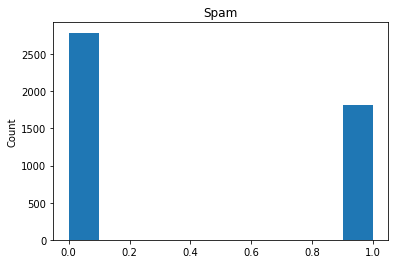

In [261]:
import matplotlib.pyplot as plt

# Spam Histogram
plt.hist(data = df, x = 'spam')
plt.ylabel('Count')
plt.title('Spam')

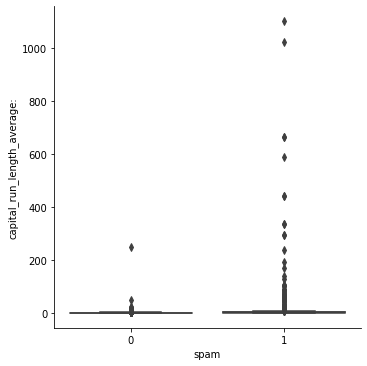

In [262]:
# Average length of sequence of consecutive capital letters in email histogram
sns.catplot(x = 'spam', y = 'capital_run_length_average:', kind = "box", data = df)

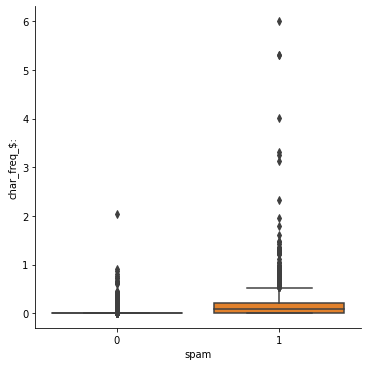

In [263]:
# Proportion of characters in email being "$" histogram
sns.catplot(x = 'spam', y = 'char_freq_$:', kind = "box", data = df)

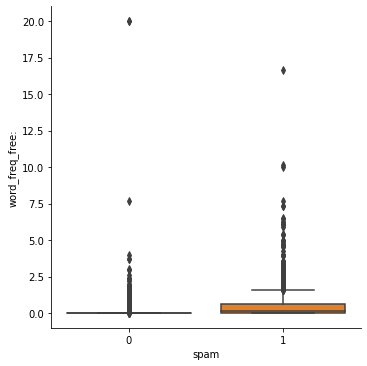

In [264]:
# Proportion of words in email being "free" histogram
sns.catplot(x = 'spam', y = 'word_freq_free:', kind = "box", data = df)

## **4:**
*Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".*

---

**Penalized Logistic Regression (L1 & L2), Unpenalized Logistic Regression, KNN Classification, Support Vector Machines/Classifier (SVM/C) Models, Decision Tree Classifier Models, and Ensemble Decision Tree Classifier Models such as Random Forest Classifier Models or Bootstrap aggregation 'bagging' Models.**

---




## **5:**

*Describe the importance of training and test data.  Why do we separate data into these subsets?*

---

**We separate our data into test and training data as to be able to test our model in question using a subset of data ('test' subset) that is different than the data the model was initially trained on (the 'train' subset). This is done to get an accurate assessment of whether our model is effective at predicting unseen data or not.**

---

##**6:**

*What is k-fold cross validation and what do we use it for?*

---

**K-fold cross validation refers to a kind of multi-sampling procedure where a sample dataset is randomly divided into k number of groups where one group is assigned as the 'test' subset and the rest of the groups (k-1) are assigned as 'training' subsets. Our model is trained using these k-1 training data and then evaluated using the 'test' data.**

**This procedure of picking which pre-assigned k-groups are 'test' or 'train' subsets, as well as the training and testing of our model using them, is run k number of times (splits) so that each k-fold group gets to act as the 'test' subset for our model once, and act to 'train' our model k-1 number of times. It is important to note that the initial random assignment of observations into k-groups is done only once at the beginning to maintain each observation in the data acting as 'test' once and 'train' k-1 times. (Note: splits here refers to the number of iterations within one cross-validation run, and not the number of repeats used in repeat cross-validation).**

**K-fold cross validation is preferred to a one-off test-train split evaluation of our model since it allows us to get multiple unique evaluations of how "objective" (closer to the truth) our model predictions are, without needing extra sample datasets than the one you have.**

---

##**7:**

*How is k-fold cross validation different from stratified k-fold cross validation?*

---

**When k-fold cross-validation shuffles and randomly assigns observations to k-fold groups, it gives each observation a uniform probablity of being put into one of the k-groups. But given an outcome with multiple categories, this uniform probability assignment might lead to k-fold groups that are biased, with outcome category distributions that are different than the distribution of outcome categories in our original, full dataset.**

**Stratified k-fold cross-validation fixes this issue by insuring our k-fold groups match our original dataset in terms of outcome proportions. It assigns observations to k-groups not using a unform probability distribution, but the actual distribution of outcome categories in our dataset.**

**This is especially important if our outcomes are relatively skewed towards being in one or more category. Meaning if we uniformly assign these observations into k-groups, some of those groups might end up having little to no representation of one of the outcome categories and our model would then be inaccurately trained and evaluated.** 

---

##**8:**

*Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.*

In [265]:
df_3v = df.loc[:, ['capital_run_length_average:', 'char_freq_$:', 'word_freq_free:', 'spam']]
df_3v.head()

,capital_run_length_average:,char_freq_$:,word_freq_free:,spam
0,3.756,0.000,0.32,1
1,5.114,0.180,0.14,1
2,9.821,0.184,0.06,1
3,3.537,0.000,0.31,1
4,3.537,0.000,0.31,1


In [266]:
y1 = df_3v['spam']
X1 = df_3v.loc[:, df_3v.columns != 'spam']

print(y1[0:5])
X1.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64


,capital_run_length_average:,char_freq_$:,word_freq_free:
0,3.756,0.000,0.32
1,5.114,0.180,0.14
2,9.821,0.184,0.06
3,3.537,0.000,0.31
4,3.537,0.000,0.31


**Train-test splitting our data.**

In [267]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

print(y1_train[0:5])
X1_train.head()

118     1
261     1
598     1
1770    1
905     1
Name: spam, dtype: int64


,capital_run_length_average:,char_freq_$:,word_freq_free:
118,102.666,0.000,0.00
261,5.423,0.707,1.11
598,2.551,0.000,0.00
1770,5.210,0.000,3.26
905,2.441,0.433,0.00


####**KNN Classification**

In [268]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [269]:
from sklearn.neighbors import KNeighborsClassifier

# To tune the parameter defining number of k neighbors
knn1_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
p_grid_knn1 = {'kneighborsclassifier__n_neighbors': [1,3,5,7,9,11,13,15]}

grid_knn1 = GridSearchCV(knn1_pipe, p_grid_knn1, cv=10)
grid_knn1.fit(X1_train, y1_train)

print("KNN Classifier (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_knn1.best_score_))
print("best parameters: {}".format(grid_knn1.best_params_))
print("test-set score: {:.3f}".format(grid_knn1.score(X1_test, y1_test)))

KNN Classifier (Scaled)
best mean cross-validation score: 0.850
best parameters: {'kneighborsclassifier__n_neighbors': 7}
test-set score: 0.844


##**9:**

*Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?*

####**Penalized (L2) Logistic Regression**

In [270]:
from sklearn.linear_model import LogisticRegression

plog_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))

# Tuning for the C parameter in the Ridge L2 penalty logistic regression
p_grid_plog = {'logisticregression__C': [0.1, 1, 10, 100, 1000, 10000]}

grid_plog = GridSearchCV(plog_pipe, p_grid_plog, cv=10)
grid_plog.fit(X1_train, y1_train)

print("L2 Penalized Logistic Regression (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_plog.best_score_))
print("best parameters: {}".format(grid_plog.best_params_))
print("test-set score: {:.3f}".format(grid_plog.score(X1_test, y1_test)))

L2 Penalized Logistic Regression (Scaled)
best mean cross-validation score: 0.825
best parameters: {'logisticregression__C': 100}
test-set score: 0.822


##**10:**

*Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?*

####**Unpenalized Logistic Regression**

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

scaler = StandardScaler().fit(X1_train)
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

ulog = LogisticRegression(penalty='none')
ulog.fit(X1_train_scaled, y1_train)

print("Unpenalized Logistic Regression (Scaled)")
print("best mean cross-validation score: {:.3f}".format(cross_val_score(ulog, X1_train_scaled, y1_train, cv=10, scoring='accuracy').mean()))
print("test-set score: {:.3f}".format(ulog.score(X1_test_scaled, y1_test)))

# No parameters to tune in unpenalized logistic regression

Unpenalized Logistic Regression (Scaled)
best mean cross-validation score: 0.825
test-set score: 0.822


##**11:**

*Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?*

####**Random Forest Classifier**

In [272]:
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler().fit(X1_train)
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Used max_features = sqrt(total # of predictors/features) = sqrt(3)~2
for_mod = RandomForestClassifier(n_estimators = 200, max_features = 2)

# Tuning for number of trees to evaluate
p_grid_for = {'n_estimators': [100, 200, 300, 400, 500]}

grid_for = GridSearchCV(for_mod, p_grid_for, cv=10)
grid_for.fit(X1_train_scaled, y1_train)

print("Random Forest Classifier Model (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_for.best_score_))
print("best parameters: {}".format(grid_for.best_params_))
print("test-set score: {:.3f}".format(grid_for.score(X1_test_scaled, y1_test)))

Random Forest Classifier Model (Scaled)
best mean cross-validation score: 0.838
best parameters: {'n_estimators': 500}
test-set score: 0.831


In [273]:
print("With 3 variables")
print(" ")
print("KNN Classifier (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_knn1.best_score_))
print("test-set score: {:.3f}".format(grid_knn1.score(X1_test, y1_test)))
print(" ")
print("L2 Penalized Logistic Regression (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_plog.best_score_))
print("test-set score: {:.3f}".format(grid_plog.score(X1_test, y1_test)))
print(" ")
print("Unpenalized Logistic Regression (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_ulog.best_score_))
print("test-set score: {:.3f}".format(grid_ulog.score(X1_test, y1_test)))
print(" ")
print("Random Forest Classifier Model (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_for.best_score_))
print("test-set score: {:.3f}".format(grid_for.score(X1_test_scaled, y1_test)))

With 3 variables
 
KNN Classifier (Scaled)
best mean cross-validation score: 0.850
test-set score: 0.844
 
L2 Penalized Logistic Regression (Scaled)
best mean cross-validation score: 0.825
test-set score: 0.822
 
Unpenalized Logistic Regression (Scaled)
best mean cross-validation score: 0.825
test-set score: 0.822
 
Random Forest Classifier Model (Scaled)
best mean cross-validation score: 0.838
test-set score: 0.831


---
**We see that using only our 3 chosen variables in our model, KNN Classification seems to have the best CV and test-data prediction scores, followed by Random Forest Classification, and then both penalized and unpenalized logistic regression. Both types of logistic regression models gave identical scores.**

---

##**12:**

*Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?*

---

**The 3 extra variables I chose were 'char_freq_!', 'word_freq_credit', and 'word_freq_000'.**

---

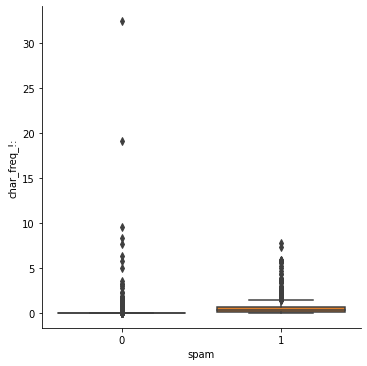

In [274]:
# Proportion of characters in email being "!" histogram
sns.catplot(x = 'spam', y = 'char_freq_!:', kind = "box", data = df)

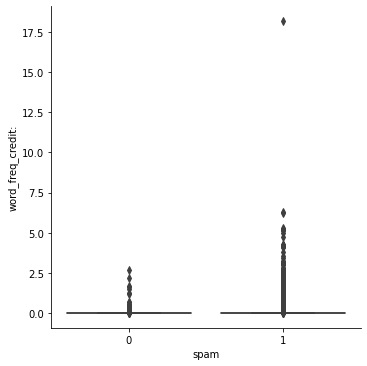

In [275]:
# Proportion of words in email being "credit" histogram
sns.catplot(x = 'spam', y = 'word_freq_credit:', kind = "box", data = df)

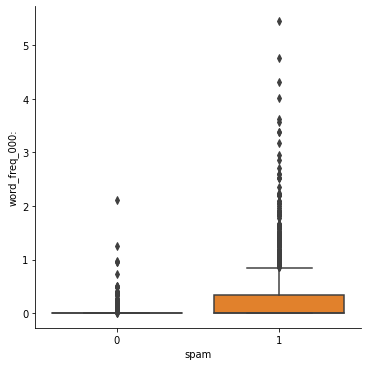

In [276]:
# Proportion of words in email being "000" histogram
sns.catplot(x = 'spam', y = 'word_freq_000:', kind = "box", data = df)

In [277]:
df_6v = df.loc[:, ['capital_run_length_average:', 'char_freq_$:', 'word_freq_free:', 'char_freq_!:', 'word_freq_credit:', 'word_freq_000:', 'spam']]
df_6v.head()

,capital_run_length_average:,char_freq_$:,word_freq_free:,char_freq_!:,word_freq_credit:,word_freq_000:,spam
0,3.756,0.000,0.32,0.778,0.00,0.00,1
1,5.114,0.180,0.14,0.372,0.00,0.43,1
2,9.821,0.184,0.06,0.276,0.32,1.16,1
3,3.537,0.000,0.31,0.137,0.00,0.00,1
4,3.537,0.000,0.31,0.135,0.00,0.00,1


In [278]:
y2 = df_6v['spam']
X2 = df_6v.loc[:, df_6v.columns != 'spam']

print(y2[0:5])
X2.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64


,capital_run_length_average:,char_freq_$:,word_freq_free:,char_freq_!:,word_freq_credit:,word_freq_000:
0,3.756,0.000,0.32,0.778,0.00,0.00
1,5.114,0.180,0.14,0.372,0.00,0.43
2,9.821,0.184,0.06,0.276,0.32,1.16
3,3.537,0.000,0.31,0.137,0.00,0.00
4,3.537,0.000,0.31,0.135,0.00,0.00


**Train-test splitting our data.**

In [279]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)

print(y2_train[0:5])
X2_train.head()

118     1
261     1
598     1
1770    1
905     1
Name: spam, dtype: int64


,capital_run_length_average:,char_freq_$:,word_freq_free:,char_freq_!:,word_freq_credit:,word_freq_000:
118,102.666,0.000,0.00,0.542,1.28,0.00
261,5.423,0.707,1.11,0.862,0.00,0.00
598,2.551,0.000,0.00,3.333,0.00,0.00
1770,5.210,0.000,3.26,2.152,0.00,0.00
905,2.441,0.433,0.00,0.433,0.00,0.76


###**KNN Classification**

In [280]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [281]:
from sklearn.neighbors import KNeighborsClassifier

# To tune the parameter defining number of k neighbors
knn2_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
p_grid_knn2 = {'kneighborsclassifier__n_neighbors': [1,3,5,7,9,11,13,15]}

grid_knn2 = GridSearchCV(knn2_pipe, p_grid_knn2, cv=10)
grid_knn2.fit(X2_train, y2_train)

print("KNN Classifier (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_knn2.best_score_))
print("best parameters: {}".format(grid_knn2.best_params_))
print("test-set score: {:.3f}".format(grid_knn2.score(X2_test, y2_test)))

KNN Classifier (Scaled)
best mean cross-validation score: 0.881
best parameters: {'kneighborsclassifier__n_neighbors': 9}
test-set score: 0.874


---
**Yes, the KNN Classification model with 6 predictors had better CV and test-data prediction scores than all the previous models that were run with only 3 variables.**

---

##**13:**

*Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?*

####**Penalized (L2) Logistic Regression**

In [282]:
from sklearn.linear_model import LogisticRegression

plog_pipe2 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))

# Tuning for the C parameter in the Ridge L2 penalty logistic regression
p_grid_plog2 = {'logisticregression__C': [0.1, 1, 10, 100, 1000, 10000]}

grid_plog2 = GridSearchCV(plog_pipe2, p_grid_plog2, cv=10)
grid_plog2.fit(X2_train, y2_train)

print("L2 Penalized Logistic Regression (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_plog2.best_score_))
print("best parameters: {}".format(grid_plog2.best_params_))
print("test-set score: {:.3f}".format(grid_plog2.score(X2_test, y2_test)))

L2 Penalized Logistic Regression (Scaled)
best mean cross-validation score: 0.839
best parameters: {'logisticregression__C': 100}
test-set score: 0.834


####**Unpenalized Logistic Regression**

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

scaler = StandardScaler().fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

ulog2 = LogisticRegression(penalty='none')
ulog2.fit(X2_train_scaled, y2_train)

print("Unpenalized Logistic Regression (Scaled)")
print("best mean cross-validation score: {:.3f}".format(cross_val_score(ulog2, X2_train_scaled, y2_train, cv=10, scoring='accuracy').mean()))
print("test-set score: {:.3f}".format(ulog2.score(X2_test_scaled, y2_test)))

# No parameters to tune in unpenalized logistic regression

Unpenalized Logistic Regression (Scaled)
best mean cross-validation score: 0.839
test-set score: 0.834


####**Random Forest Classifier**

In [284]:
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler().fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# Used max_features = sqrt(total # of predictors/features) = sqrt(6)~3
for_mod2 = RandomForestClassifier(n_estimators = 200, max_features = 3)

# Tuning for number of trees to evaluate
p_grid_for2 = {'n_estimators': [100, 200, 300, 500, 600]}

grid_for2 = GridSearchCV(for_mod2, p_grid_for2, cv=10)
grid_for2.fit(X2_train_scaled, y2_train)

print("Random Forest Classifier Model (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_for2.best_score_))
print("best parameters: {}".format(grid_for2.best_params_))
print("test-set score: {:.3f}".format(grid_for2.score(X2_test_scaled, y2_test)))

Random Forest Classifier Model (Scaled)
best mean cross-validation score: 0.881
best parameters: {'n_estimators': 100}
test-set score: 0.893


In [285]:
print("With 6 variables")
print(" ")
print("KNN Classifier (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_knn2.best_score_))
print("test-set score: {:.3f}".format(grid_knn2.score(X2_test, y2_test)))
print(" ")
print("L2 Penalized Logistic Regression (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_plog2.best_score_))
print("test-set score: {:.3f}".format(grid_plog2.score(X2_test, y2_test)))
print(" ")
print("Unpenalized Logistic Regression (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_ulog2.best_score_))
print("test-set score: {:.3f}".format(grid_ulog2.score(X2_test, y2_test)))
print(" ")
print("Random Forest Classifier Model (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_for2.best_score_))
print("test-set score: {:.3f}".format(grid_for2.score(X2_test_scaled, y2_test)))
print(" ")
print(" ")
print("With 3 variables")
print(" ")
print("KNN Classifier (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_knn1.best_score_))
print("test-set score: {:.3f}".format(grid_knn1.score(X1_test, y1_test)))
print(" ")
print("L2 Penalized Logistic Regression (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_plog.best_score_))
print("test-set score: {:.3f}".format(grid_plog.score(X1_test, y1_test)))
print(" ")
print("Unpenalized Logistic Regression (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_ulog.best_score_))
print("test-set score: {:.3f}".format(grid_ulog.score(X1_test, y1_test)))
print(" ")
print("Random Forest Classifier Model (Scaled)")
print("best mean cross-validation score: {:.3f}".format(grid_for.best_score_))
print("test-set score: {:.3f}".format(grid_for.score(X1_test_scaled, y1_test)))

With 6 variables
 
KNN Classifier (Scaled)
best mean cross-validation score: 0.881
test-set score: 0.874
 
L2 Penalized Logistic Regression (Scaled)
best mean cross-validation score: 0.839
test-set score: 0.834
 
Unpenalized Logistic Regression (Scaled)
best mean cross-validation score: 0.839
test-set score: 0.834
 
Random Forest Classifier Model (Scaled)
best mean cross-validation score: 0.881
test-set score: 0.893
 
 
With 3 variables
 
KNN Classifier (Scaled)
best mean cross-validation score: 0.850
test-set score: 0.844
 
L2 Penalized Logistic Regression (Scaled)
best mean cross-validation score: 0.825
test-set score: 0.822
 
Unpenalized Logistic Regression (Scaled)
best mean cross-validation score: 0.825
test-set score: 0.822
 
Random Forest Classifier Model (Scaled)
best mean cross-validation score: 0.838
test-set score: 0.831


---
**Now that we added 3 more variables to our initial 3 for a total of 6 predictor variables, we see that the Random Forest Classification and KNN Classification had the same CV prediction scores, but the Random Forest Classification model had a higher test-data prediction score. So for this reason, we will choose the Random Forest Classification model with 6 predictor variables as our final model.**

---

##**14:**

*What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.*

**A variable which counts the frequency of the word 'click' (word_freq_click) in an email. This is because 'click' is not an overused word in personal or professional email, but ubiquitous in spam email and ads of most kinds (given that the primary purpose of a spam email is to get the user click links to external, unverified websites.**

**I think this variable would be effective in improving the predictive power of our model given that it is sensitive enough applicable to many kinds of spam emails (money schemes, advertisements, etc.), while being uncommon enough in traditional email settings as to have a low risk of incorrectly labeling email as spam when it is not.** 

##**15:**

*Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.*

**KNN Regression, Ridge Regresssion, Lasso Regression, Ordinary Least Squares (OLS) Regression, Bagging (bootstrap aggregation) Regression, and Random Forest Regression.**